In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv('Ladesaeulenregister_CSV.csv', skiprows=10, sep=';', decimal=',',
                 encoding="ISO-8859-1", engine='python')

In [20]:
df.head()

,Betreiber,Straße,Hausnummer,Adresszusatz,Postleitzahl,Ort,Bundesland,Kreis/kreisfreie Stadt,Breitengrad,Längengrad,...,Public Key1,Steckertypen2,P2 [kW],Public Key2,Steckertypen3,P3 [kW],Public Key3,Steckertypen4,P4 [kW],Public Key4
0,EnBW mobility+ AG und Co.KG,Hauptstraße,91c,NaN,73340,Amstetten,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.5785342,9.8748399,...,NaN,"DC Kupplung Combo, DC CHAdeMO",50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SWU Energie GmbH,Lindenstraße,7,NaN,89176,Asselfingen,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.528983,10.193397,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SWU Energie GmbH,Öllengasse,10,NaN,89177,Ballendorf,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.553539,10.082678,...,NaN,AC Steckdose Typ 2,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SWU Energie GmbH,Sterngasse,6,NaN,88481,Balzheim,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.179959,10.076977,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,EnBW mobility+ AG und Co.KG,Heuweg,12,NaN,89179,Beimerstetten,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.480387,9.980588,...,NaN,"AC Steckdose Typ 2, AC Schuko",22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df.columns

Index(['Betreiber', 'Straße', 'Hausnummer', 'Adresszusatz', 'Postleitzahl',
       'Ort', 'Bundesland', 'Kreis/kreisfreie Stadt', 'Breitengrad',
       'Längengrad', 'Inbetriebnahmedatum', 'Anschlussleistung',
       'Normalladeeinrichtung', 'Anzahl Ladepunkte', 'Steckertypen1',
       'P1 [kW]', 'Public Key1', 'Steckertypen2', 'P2 [kW]', 'Public Key2',
       'Steckertypen3', 'P3 [kW]', 'Public Key3', 'Steckertypen4', 'P4 [kW]',
       'Public Key4'],
      dtype='object')

<AxesSubplot:>

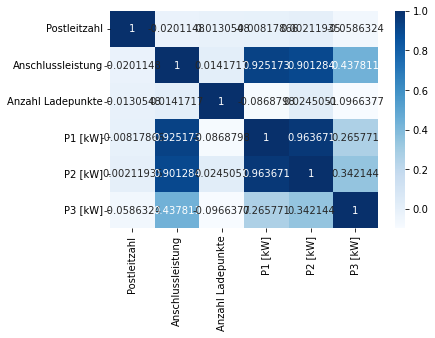

In [7]:
import seaborn as sns
%matplotlib inline


# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True,cmap='Blues', fmt='g')

In [17]:
df[df['P3 [kW]'].notna()].corr().columns

Index(['Postleitzahl', 'Anschlussleistung', 'Anzahl Ladepunkte', 'P1 [kW]',
       'P2 [kW]', 'P3 [kW]'],
      dtype='object')

In [ ]:
for i in ['Postleitzahl', 'Anschlussleistung', 'Anzahl Ladepunkte', 'P1 [kW]',
       'P2 [kW]', 'P3 [kW]']:

<AxesSubplot:ylabel='Density'>

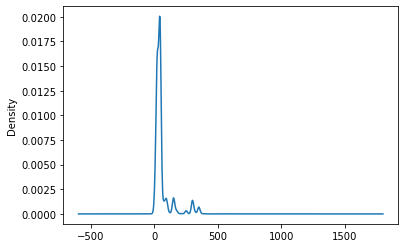

In [22]:
df['Anschlussleistung'].plot(kind='kde')


<AxesSubplot:ylabel='Density'>

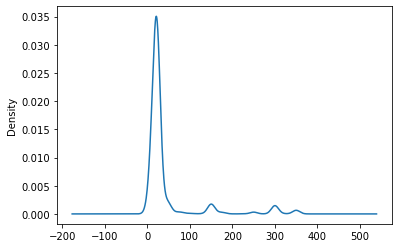

In [26]:
df['P1 [kW]'].plot(kind='kde')


<AxesSubplot:ylabel='Density'>

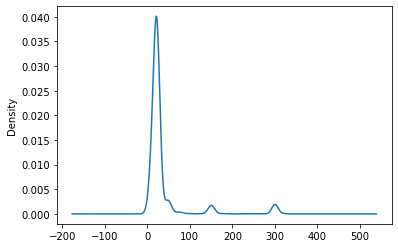

In [27]:
df['P2 [kW]'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

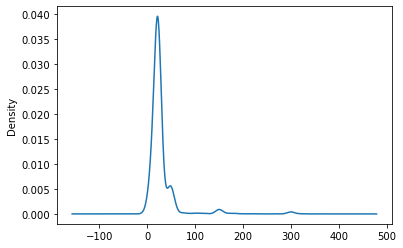

In [28]:
df['P3 [kW]'].plot(kind='kde')

In [29]:
df['P3 [kW]'].mean()

28.914511930585686

In [21]:
df['Betreiber'].plot(kind='hist', edgecolor='black')


TypeError: no numeric data to plot

<AxesSubplot:ylabel='Density'>

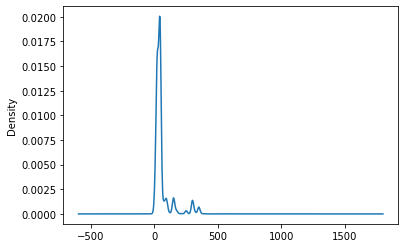

In [16]:
df['Anschlussleistung'].plot(kind='kde')


In [ ]:
corr.head()

In [ ]:
df.head()

In [ ]:
df['P2 [kW]'].unique()

In [ ]:
df.info()

In [ ]:
df['Betreiber'].unique()

In [ ]:
df['Betreiber'].value_counts()


In [ ]:
df.groupby("Betreiber").sum().apply(lambda x: x.sort_values(ascending=False).head())

In [ ]:
import seaborn as sns

ax = sns.countplot(x="Betreiber",data=df)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df[[ 'Anzahl Ladepunkte', 'Steckertypen1',
       'P1 [kW]', 'Public Key1', 'Steckertypen2', 'P2 [kW]', 'Public Key2',
       'Steckertypen3', 'P3 [kW]', 'Public Key3', 'Steckertypen4', 'P4 [kW]',
       'Public Key4']]

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df['Breitengrad'] = df['Breitengrad'].astype(float)
df['Längengrad'] = df['Längengrad'].astype(float)

In [ ]:
!pip install folium

In [ ]:
import folium
print(folium.__version__)
from folium.plugins import MarkerCluster
from folium import IFrame

%matplotlib inline

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:

m = folium.Map(location=[48.566846, 13.436720], zoom_start=13, tiles="Stamen Terrain")

tooltip = "Click me!"

for index,row in enumerate(df[["Breitengrad","Längengrad"]].head(10).itertuples()):
    html="a"
    try:
        folium.Marker([float(row.Breitengrad[:-1].replace(",",".")), float(row.Längengrad[:-1].replace(",","."))], popup=html, tooltip=tooltip).add_to(m)
    except:
        print(row)
m